# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
#импортируем библиотеки, создаем переменную data и сохраним в ней наш датасет, используем сепаратор для разделения
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
#рассмотрим датафрейм подробнее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#исправим_стилистическую_ошибку
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [6]:
#рассмотрим исправленный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition

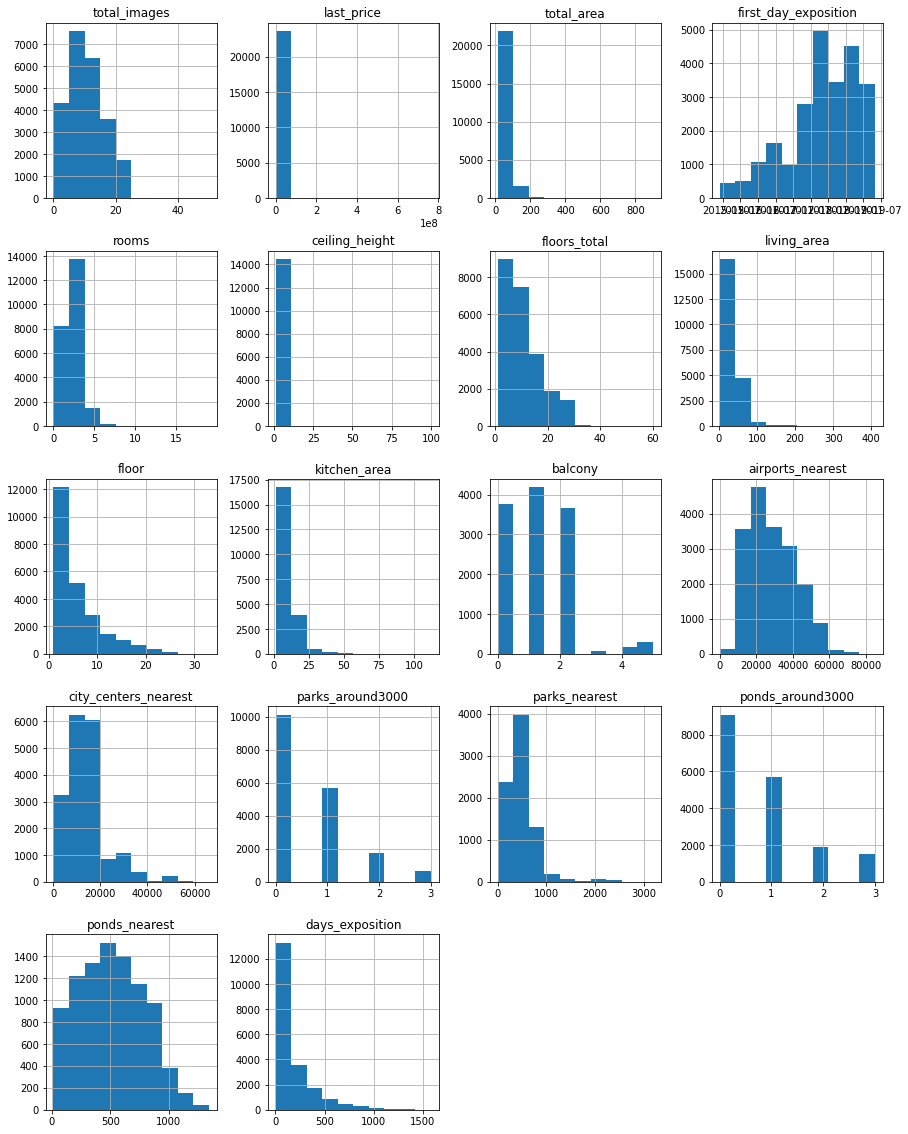

In [9]:
#построим гистограммы
data.hist(figsize=(15, 20))

### Предобработка данных

Приступим к поиску и устранению пропусков, для начала выведем названия столбцов и посчитаем кол-во пропусков в них

In [10]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Количество пропусков достаточно большое, будем рассматривать каждый столбец с пропусками и решать что с ним будем делать.

**is_apartment:**   Заменим все пустые значения is_apartment на false, так как скорее всего, если они пропущены, значит это квартиры.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**balcony:**
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
Такие пропуски правильно заменить на 0:

Число балконов должно быть целым.

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

**locality_name:** Название населенного пункта мы заполнить не сможем, пропущенных значений 49, будем считать что это не повлияет на наши расчеты и удалим эти пропуски

In [13]:
data.dropna(subset=['locality_name'], inplace=True)

**floors_total:** 86 пропусков этажности зданий, выбросив эти строки, мы не исказим анализ. И переведем этажность здания в целочисленный тип данных, так как количесвтво этажей не может быть дробным.

In [14]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

**ceiling_height:** Высота потолков не самый важный параметр при покупке недвижимости, поэтому так много пропусков. В среднем по всем квартирам они не сильно отличаются, поэтому заполним пропуски высоты потолков медиальным значением 

In [15]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

**living_area:** Жилая площадь-важный параметр который часто забывают заполнять, но заполнить пропуски в этом столбце как в предыдущих случаях не получится, так как этот параметр входит в общую площадь квартиры. Предлагаю вычислить коэфициент, который будет отношением медианы всех значений жилых площадей к медиане всех значений общих площадей и умножить этот коэфициент на общую площадь. И этим результатом будем заполнять пропуска

In [16]:
living_index = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_index * data['total_area'], inplace=True)

**kitchen_area:** Аналогично предыдущему случаю, заполним столбец площадь кухни

In [17]:
kitchen_index = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_index * data['total_area'], inplace=True)

**parks_around3000 и ponds_around3000:** Логично, что если пропущены значения в этих столбцах, значит их нет в радиусе 3000 м. Заменим пропуски на 0 и переведем в целый тип данных

In [18]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [19]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [20]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,9.1000,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,8.8100,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.65,5,30.000000,5,False,...,9.0000,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.000000,15,False,...,11.0000,2,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.65,9,18.923077,2,False,...,5.7400,0,Коммунар,NaN,NaN,0,NaN,0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.500000,3,False,...,5.5000,0,посёлок Дзержинского,NaN,NaN,0,NaN,0,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.500000,4,False,...,6.0000,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,...,8.5000,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,...,9.9225,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Рассмотрев пропуски связанные с геолокацией, мы понимаем, что заполнить эти пропуски невозможно, а удалять их нельзя, так как мы потеряем огромную часть данных. Оставляем как есть.

**days_exposition:** Пропуски в этом столбце возможно объяснить, что эти объявления еще не сняты с публикциии. Оставляем как есть.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Рассмотрев еще раз типы данных: площадь, высота потолков, расстояние может быть дробным числом, а вот цену выставляют продавцы и редко бывает, что в стоимости недвижимсти указываются копейки, переведем цену в целые числа.

In [22]:
#Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Рассмотрим наличие явных дубликатов**

In [24]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют, рассмотрим наличие неявных дубликатов. Нас интересуют названия населенных пунктов.

In [25]:
len(data['locality_name'].dropna().unique())

364

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

видим поселок и посёлок - заменим на ё на е

In [27]:
data['locality_name'] = data['locality_name'].str.replace("ё", "е")

In [28]:
data['locality_name'] = data['locality_name'].str.replace("поселок городского типа", "поселок")

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

In [30]:
len(data['locality_name'].dropna().unique())

329

приведем к все к нижнему регистру

In [31]:
data['locality_name'] = data['locality_name'].str.lower()

In [32]:
len(data['locality_name'].dropna().unique())

329

убрали 35 неявных дубликатов

**Рассмотрим редкие и выбивающиеся значения (аномалии) во всех столбцах**

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [34]:
#рассмотрим столбец total_images
data['total_images'].describe()
#здесь ничего необычного

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [35]:
#рассмотрим столбец last_price
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [36]:
data = data[(data['last_price'] > 500000) & (data['last_price'] < 100000000)]

In [37]:
data['last_price'].median()

4630000.0

Цена - понятие субъективное, каждый в праве выставлять свою квартиру по любой цене, будем считать, что квартиры стоимостью менее 500 тыс.руб и более 100 млн руб. это не реальные объявления, выбросим их из датафрейма.

In [38]:
data['total_area'].describe()

count    23510.000000
mean        59.912805
std         33.467572
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        590.000000
Name: total_area, dtype: float64

<AxesSubplot:>

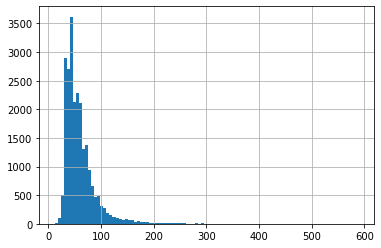

In [39]:
data['total_area'].hist(bins=100)

In [40]:
data = data[(data['total_area'] < 200)]

In [41]:
data['total_area'].median()

51.7

Выбросим квартиры площадью более 200 квадратных метров, так как мы исследуем квартиры, а не загородные дома.

In [42]:
data['first_day_exposition'].describe()

/tmp/ipykernel_104/546544682.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23311
unique                   1487
top       2018-02-01 00:00:00
freq                      362
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Замечаний по этому столбцу нет, первое объявление в 2014г, последнее 2019.

In [43]:
data['rooms'].describe()

count    23311.000000
mean         2.034404
std          0.995192
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

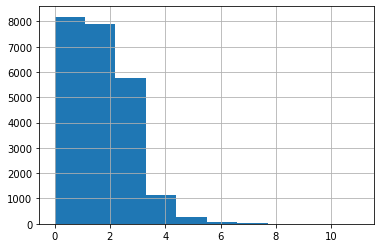

In [44]:
data['rooms'].hist(bins=10)

In [45]:
data = data[(data['rooms'] < 7)]

Выбросим из датафрейма квартиры, с количеством комнат больше 7

In [46]:
data['ceiling_height'].describe()

count    23287.000000
mean         2.719832
std          0.994054
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [47]:
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] < 5)]

In [48]:
data['ceiling_height'].describe()

count    23233.000000
mean         2.691925
std          0.205192
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

Выбросим объявления квартир с потолками более 5 м.

In [49]:
data['floors_total'].describe()

count    23233.000000
mean        10.733655
std          6.599882
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [50]:
data = data[(data['floors_total'] < 35)]

Выбросим объявления с выстой здания более 35 этажей.

In [51]:
data['living_area'].describe()

count    23205.000000
mean        33.239734
std         17.083461
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

В total_area поставили максимум 200 квадратных метров, а здесь 164, поэтому оставим без изменений.

In [52]:
data['floor'].describe()

count    23205.000000
mean         5.881189
std          4.858156
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64

Максимальное значение не превышает максимальное значение в floors_total, оставляем столбец без изменений.

Столбцы с типом bool проверять нет смысла. Пропускаем их.

In [53]:
data['kitchen_area'].describe()

count    23205.000000
mean        10.263274
std          5.288454
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

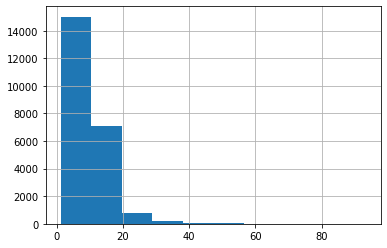

In [54]:
data['kitchen_area'].hist(bins=10)

In [55]:
data = data[(data['kitchen_area'] < 40)]

Кухни более 40 кв.м. считаем выбивающимися значениями и выбрасываем их.

In [56]:
data['balcony'].describe()

count    23099.000000
mean         0.595350
std          0.959992
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

<AxesSubplot:>

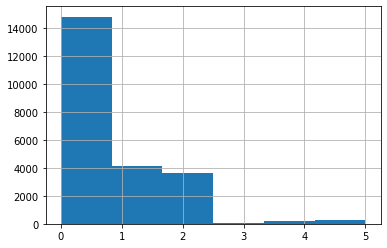

In [57]:
data['balcony'].hist(bins=6)

Замечаний по этому столбцу нет. Оставляем как есть.

Остались пропуски в столбцах с геолокацией для них предобработку не проводим.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23099 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23099 non-null  int64         
 1   last_price            23099 non-null  int64         
 2   total_area            23099 non-null  float64       
 3   first_day_exposition  23099 non-null  datetime64[ns]
 4   rooms                 23099 non-null  int64         
 5   ceiling_height        23099 non-null  float64       
 6   floors_total          23099 non-null  int64         
 7   living_area           23099 non-null  float64       
 8   floor                 23099 non-null  int64         
 9   is_apartment          23099 non-null  bool          
 10  studio                23099 non-null  bool          
 11  open_plan             23099 non-null  bool          
 12  kitchen_area          23099 non-null  float64       
 13  balcony         

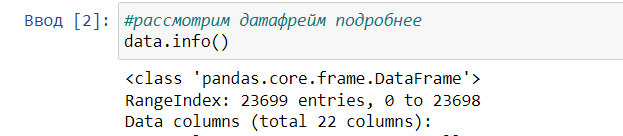

In [59]:
round((23699-23119) / 23699 * 100, 1)

2.4

**Посмотрев начальное количество строк и количество строк после предобработки, выясняем, что удалено 2,4 % от всех строк.
Типы столбцов соответствуют их содержимому. Будем считать, что с предобработкой данных справились.**

# Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец со стоимостью 1 квадратного метра.

In [60]:
#разделим цену квартиры на общую площадь
data['price_per_m2'] = data['last_price'] / data['total_area'] /1000

In [61]:
data['price_per_m2'].describe()

count    23099.000000
mean        97.810532
std         41.442778
min         10.185185
25%         76.451438
50%         94.722598
75%        113.623981
max        848.484848
Name: price_per_m2, dtype: float64

Добавим столбец дня недели публикации

In [62]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [63]:
data['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5])

Добавим столбец месяц публикации

In [64]:
data['month'] = data['first_day_exposition'].dt.month

In [65]:
data['month'].unique()

array([ 3, 12,  8,  7,  9, 11,  4,  5,  2,  6,  1, 10])

Добавим столбец год публикации

In [66]:
data['year'] = data['first_day_exposition'].dt.year

In [67]:
data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

Добавим столбец тип этажа

In [68]:
data['floor_type'] = 'other'

In [69]:
data.loc[data['floor'] == 1, 'floor_type'] = 'first'

In [70]:
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last'

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23099 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23099 non-null  int64         
 1   last_price            23099 non-null  int64         
 2   total_area            23099 non-null  float64       
 3   first_day_exposition  23099 non-null  datetime64[ns]
 4   rooms                 23099 non-null  int64         
 5   ceiling_height        23099 non-null  float64       
 6   floors_total          23099 non-null  int64         
 7   living_area           23099 non-null  float64       
 8   floor                 23099 non-null  int64         
 9   is_apartment          23099 non-null  bool          
 10  studio                23099 non-null  bool          
 11  open_plan             23099 non-null  bool          
 12  kitchen_area          23099 non-null  float64       
 13  balcony         

Добавим столбец растояние до центра в километрах

In [72]:
data['citycenters_nearest_km'] = round(data['city_centers_nearest'] / 1000, 1)

In [73]:
data['citycenters_nearest_km']

0        16.0
1        18.6
2        13.9
3         6.8
5         NaN
         ... 
23694     4.2
23695     NaN
23696     NaN
23697    10.4
23698     NaN
Name: citycenters_nearest_km, Length: 23099, dtype: float64

### Проведите исследовательский анализ данных

Исследуем основные параметры квартир.

Общая площадь:

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23099 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23099 non-null  int64         
 1   last_price              23099 non-null  int64         
 2   total_area              23099 non-null  float64       
 3   first_day_exposition    23099 non-null  datetime64[ns]
 4   rooms                   23099 non-null  int64         
 5   ceiling_height          23099 non-null  float64       
 6   floors_total            23099 non-null  int64         
 7   living_area             23099 non-null  float64       
 8   floor                   23099 non-null  int64         
 9   is_apartment            23099 non-null  bool          
 10  studio                  23099 non-null  bool          
 11  open_plan               23099 non-null  bool          
 12  kitchen_area            23099 non-null  float6

<AxesSubplot:>

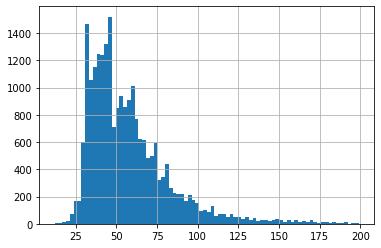

In [75]:
data['total_area'].hist(bins=80)

Большинство квартир на рынке недвижимости площадью от 30 до 75 квадратных метров.

Жилая площадь:

<AxesSubplot:>

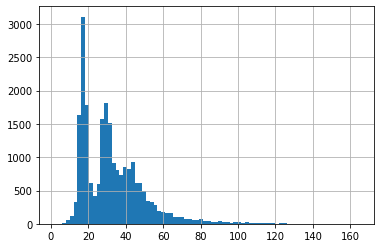

In [76]:
data['living_area'].hist(bins=80)

<AxesSubplot:ylabel='Frequency'>

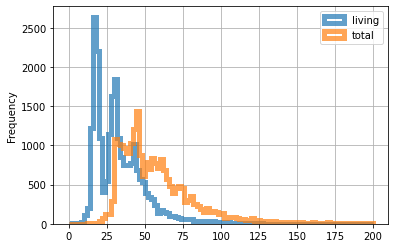

In [77]:
ax = data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='living',
)
data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='total',
    ax=ax,
    grid=True,
    legend=True,
) 

Видим что графики жилой площади и общей площади прямопроцопрциональны, со смещением, так как общая площадь больше.

Площадь кухни:

<AxesSubplot:>

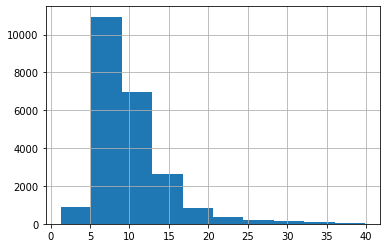

In [78]:
data['kitchen_area'].hist(bins=10)

В большинстве квартир площадь кухни равна от 5 до 15 квадратных метров.

Цена объекта:

<AxesSubplot:>

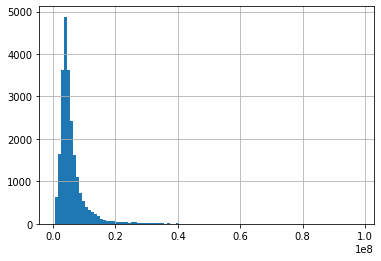

In [79]:
data['last_price'].hist(bins=100)

In [80]:
data['last_price'].describe()

count    2.309900e+04
mean     5.882019e+06
std      5.101134e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      9.800000e+07
Name: last_price, dtype: float64

Средняя цена на квартиры равна около 6 млн руб

Количество комнат.

<AxesSubplot:>

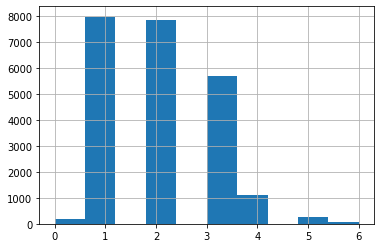

In [81]:
data['rooms'].hist(bins=10)

Чаще всего встречаются 1,2,3 комнатные квартиры.

Высота потолков.

<AxesSubplot:>

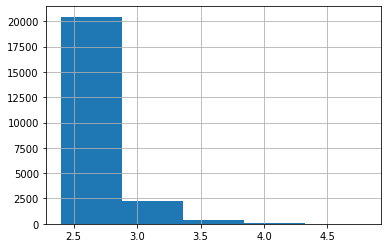

In [82]:
data['ceiling_height'].hist(bins=5)

Самая распространенная высота потолков от 2,5 до 3 метров.

Этаж квартиры

<AxesSubplot:>

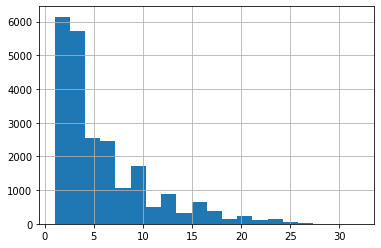

In [83]:
data['floor'].hist(bins=20)

Чаще всего в продаже квартиры на 1,2,3,4 этаже.

Тип этажа.

<AxesSubplot:>

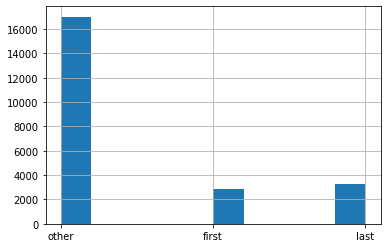

In [84]:
data['floor_type'].hist(bins=10)

Продают квартиры на первом или последнем этаже примерно одинаково часто. Первый и последний этаж составляет примерно по 10% от всех квартир.

Общее количество этажей в доме.

<AxesSubplot:>

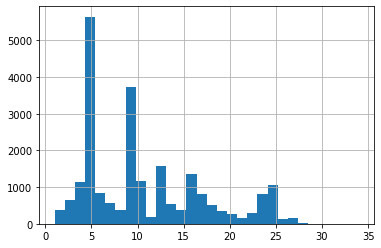

In [85]:
data['floors_total'].hist(bins=30)

Чаще всего попадаются 5 или 9 этажные дома.

Расстояние до центра.

<AxesSubplot:>

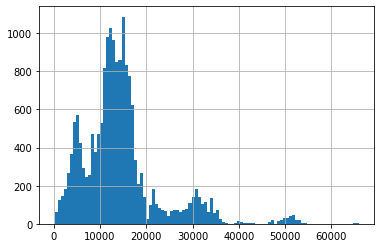

In [86]:
data['city_centers_nearest'].hist(bins=100)

Большинство квартир продаются от 10 до 15 км от центра

Расстояние до аэропорта.

<AxesSubplot:>

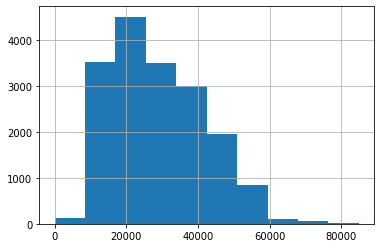

In [87]:
data['airports_nearest'].hist(bins=10)

В среднем квартиры располагаются от 10 до 25 км от аэропорта.

Расстояние до парка.

<AxesSubplot:>

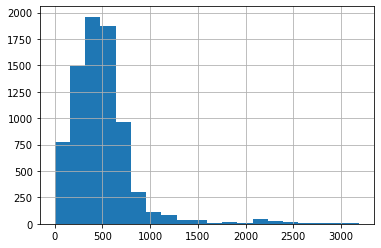

In [88]:
data['parks_nearest'].hist(bins=20)

Большинство квартир располагаются в 200-600 м от парка.

Дни недели публикации объявления.

<AxesSubplot:>

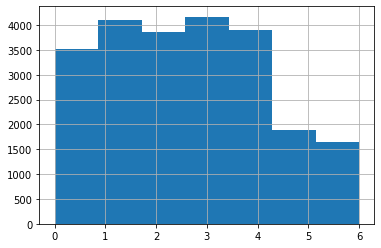

In [89]:
data['weekday'].hist(bins=7)

Чаще объявления публикуют в будние дни.

Месяц публикации объявления.

<AxesSubplot:>

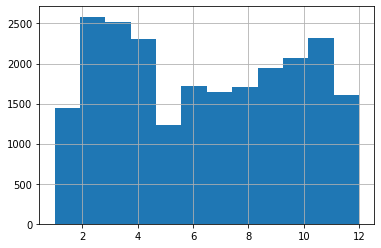

In [90]:
data['month'].hist(bins=12)

Реже выкладывают в месяца до и после нового года и летом. (Возможно, что лето-сезон отпусков, а до нового года людям не до этого, а после нового года, люди отдыхают.

**Рассмотрел гистограммы основных параметров, по каждому сделал коменнтарии, можно сделать вывод, что после предобработки данные "не исказились".**

**Изучим как быстро продавались квартиры:**

В данном столбце находятся квартиры, которые проданы и не проданы. Нас интересуют только проданные квартиры, поэтому создадим новую переменную и оставим в ней, только заполненные значения.

In [91]:
solded = data[~data['days_exposition'].isna()]

<AxesSubplot:>

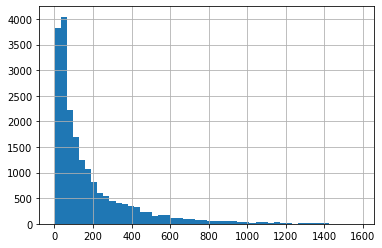

In [92]:
solded['days_exposition'].hist(bins=50)

In [93]:
solded['days_exposition'].describe()

count    20047.000000
mean       179.185763
std        217.952511
min          1.000000
25%         45.000000
50%         94.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [94]:
#посчитаем среднее
solded['days_exposition'].mean()

179.18576345587869

In [95]:
#посчитаем медиану
solded['days_exposition'].median()

94.0

Согласно графику, чаще всего квартиру продают около 3 месяцев, а если быть точнее от 60 до 120 дней. Примем это время за среднее время продажи квартиры. Быстрые продажи это до 60 дней, долгие больше 120 дней. Но так же мы видим, что реже, но бывают продажи квартир больее года, отнесем такие продажи к "очень долгим".

In [96]:
# КОД РЕВЬЮЕРА

print(len(data))

data[['last_price', 'total_area','rooms']].describe().loc[['min', 'max']]

23099


,last_price,total_area,rooms
min,520000.0,12.0,0.0
max,98000000.0,199.2,6.0


**Определим какие факторы больше всего влияют на общую (полную) стоимость объекта**

Построим диаграммы рассеивания, а потом рассмотрим коэфициент корреляции, для определения зависимости.

In [97]:
#Запишем в список интересующие нас параметры
list=(['last_price',
       'total_area',
       'living_area',
       'kitchen_area',
       'rooms',
       'floor_type',
       'weekday',
       'month',
       'year'
      ])

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year', ylabel='total_area'>],
      

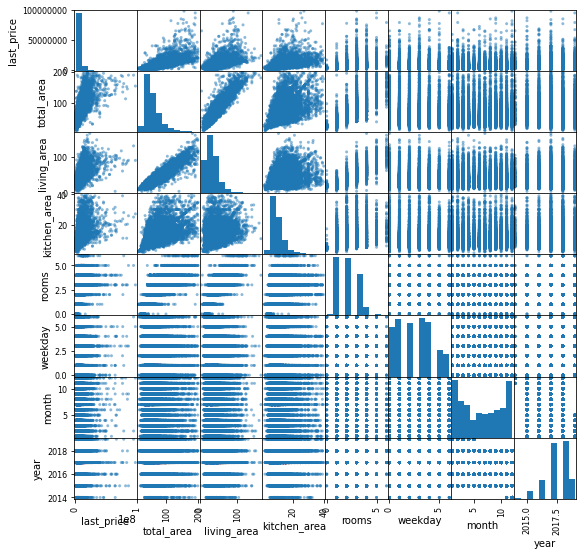

In [98]:
pd.plotting.scatter_matrix(data.loc[:,list], figsize=(9, 9))

In [99]:
data.loc[:,list].corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year
last_price,1.000000,0.727897,0.633470,0.553514,0.434996,-0.011757,0.012671,-0.046662
total_area,0.727897,1.000000,0.933583,0.606398,0.790109,-0.015701,0.011525,-0.083307
living_area,0.633470,0.933583,1.000000,0.396706,0.862311,-0.011764,0.003906,-0.071091
kitchen_area,0.553514,0.606398,0.396706,1.000000,0.259249,-0.012865,0.015562,-0.055142
rooms,0.434996,0.790109,0.862311,0.259249,1.000000,-0.006107,-0.002616,-0.048924
weekday,-0.011757,-0.015701,-0.011764,-0.012865,-0.006107,1.000000,0.012258,-0.001109
month,0.012671,0.011525,0.003906,0.015562,-0.002616,0.012258,1.000000,-0.272674
year,-0.046662,-0.083307,-0.071091,-0.055142,-0.048924,-0.001109,-0.272674,1.000000


Можно сделать вывод, что общая площадь, жилая площадь, площадь кухни и количество комнат влияют на цену. А день недели, месяц и год объявления не влияют на цену.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

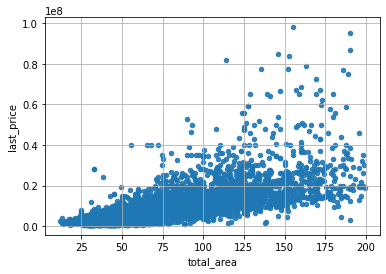

In [100]:
(data.plot(
           x='total_area', 
           y='last_price', 
           kind='scatter', 
           grid=True, 
           alpha=0.9))

<AxesSubplot:xlabel='rooms'>

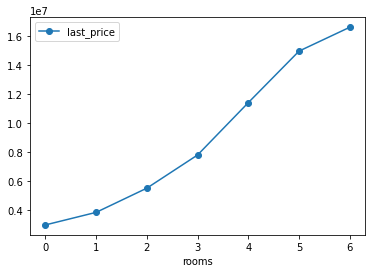

In [101]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o-')

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

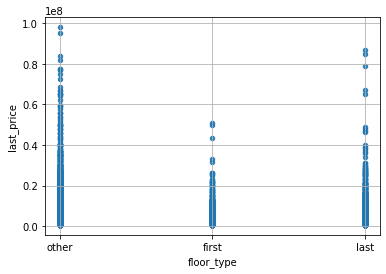

In [102]:
(data.plot(
           x='floor_type', 
           y='last_price', 
           kind='scatter', 
           grid=True, 
           alpha=0.9))

<AxesSubplot:xlabel='floor_type'>

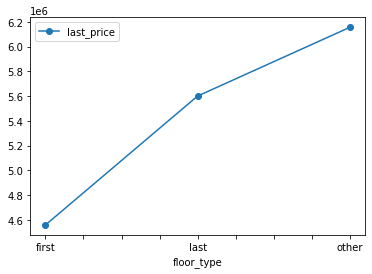

In [103]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(style='o-')

<AxesSubplot:xlabel='year'>

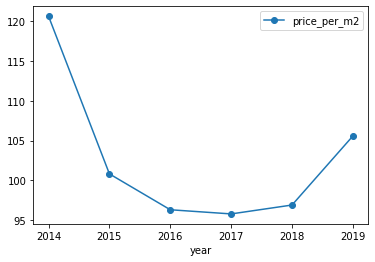

In [104]:
data.pivot_table(index='year', values='price_per_m2', aggfunc='mean').plot(style='o-')

<AxesSubplot:xlabel='year'>

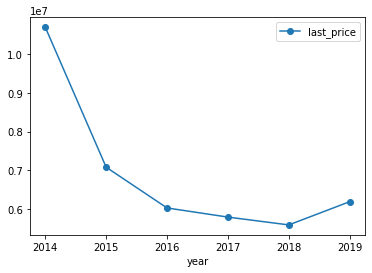

In [105]:
data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o-')

Больше всего на цену влияет общая площадь квартиры. Так же мы видим корреляцию между общей и жилой площадью.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Для начала выберем 10 населенных пунктов, с наибольшим количеством объёявлений

In [106]:
i = data['locality_name'].value_counts().index[0:10]
i

Index(['санкт-петербург', 'поселок мурино', 'поселок шушары', 'всеволожск',
       'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'деревня кудрово',
       'выборг'],
      dtype='object')

Построим таблицу, в которой указана цена за каждый квадратный метр 10 населенных пунктов с наибольшим количеством объявлений.

In [107]:
(data.query('locality_name in @i')
 .pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean')
 .sort_values(by='price_per_m2',ascending=False))

,price_per_m2
locality_name,
санкт-петербург,112.654579
пушкин,102.826254
деревня кудрово,92.473548
поселок парголово,90.332263
поселок мурино,85.602501
поселок шушары,78.577015
колпино,75.333296
гатчина,68.757679
всеволожск,68.719320


Сохраним самую маленькую и самую большую среднюю цену квадратного метра по населенному пункту.

In [108]:
#mix_price_per_m2 = data.groupby('locality_name')['price_per_m2'].mean().min()
#max_price_per_m2 = data.groupby('locality_name')['price_per_m2'].mean().max()

Выведем самый недорогой населенный пункт по средней цене за квадратный метр.

In [109]:
#data.pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean').query('price_per_m2 == @mix_price_per_m2')

Выведем самый дорогой населенный пункт по средней цене за квадратный метр.

In [110]:
#data.pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean').query('price_per_m2 == @max_price_per_m2')

Вывели 10 населенных пунктов по количеству объявлений, лидером является Санкт-Петербург.
Самым дорогим населенным пунктом по цене за квадратный метр является-Зеленогорск.
Самым недорогим-поселок Совхозный.

In [111]:
(data.query('locality_name in @i')
 .pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean')
 .sort_values(by='price_per_m2',ascending=False))

,price_per_m2
locality_name,
санкт-петербург,112.654579
пушкин,102.826254
деревня кудрово,92.473548
поселок парголово,90.332263
поселок мурино,85.602501
поселок шушары,78.577015
колпино,75.333296
гатчина,68.757679
всеволожск,68.719320


Рассмотрим как в Санкт-Петербурге стоимость квартиры зависит от расстояния до центра.

Построим гистограмму рассеивания цены квадратного метра от расстояния до центра.

<AxesSubplot:xlabel='citycenters_nearest_km', ylabel='price_per_m2'>

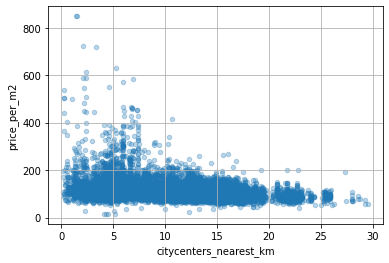

In [112]:
(data[data['locality_name'] == 'санкт-петербург']
       .plot(
           x='citycenters_nearest_km', 
           y='price_per_m2', 
           kind='scatter', 
           grid=True, 
           alpha=0.3))

Цена квадратного метра квартиры уменьшается при удалении от центра.

Рассмотрим цену каждого км от центра

<AxesSubplot:xlabel='km'>

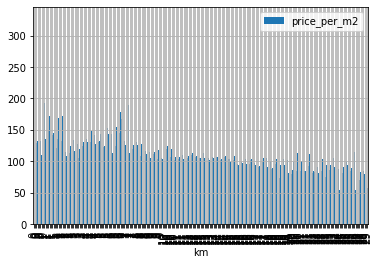

In [113]:
piter = (data[data['locality_name'] == 'санкт-петербург']
       .pivot_table(index='citycenters_nearest_km', values='price_per_m2', aggfunc='mean'))
piter['km'] = piter.index.astype('int')
piter.plot( x='km', y='price_per_m2', kind='bar', grid=True)

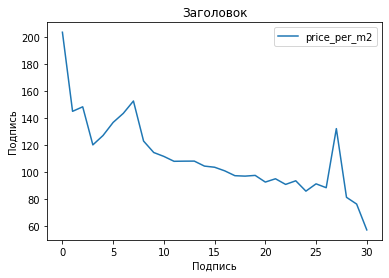

In [121]:
# КОД РЕВЬЮЕРА

df = data.copy() 

df['citycenters_nearest_km'] = round(df['citycenters_nearest_km']).astype('Int64')

(df[df['locality_name'] == 'санкт-петербург']
    .pivot_table(index='citycenters_nearest_km', values='price_per_m2', aggfunc='mean')
    .plot())

plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

Так же видим, что чем дальше от центра, тем стоимость меньше.

In [115]:
piter['km'].corr(piter['price_per_m2'])

-0.7082064112321832

Коэфициент корреляции подтверждает, что есть зависимость цены квартиры за квадратный метр в зависимости от расстояния до центра.

# Общий вывод

В данном проекте я улучшил свои навыки предобработки данных, выяснил где есть пропуски, заменял их нулями, медианными значениями или оставлял как есть в зависимости от параметра. Поменял типы данных в столбцах, в которых это было необходимо. Выявлял и устранял дубликаты. Удалял строки с нереальными значениями. Добавлял в таблицу новые столбцы. Рассматривал различные зависимости, узнал где самый дорогой и дешевый квадратный метр площади в Лен.области. Узнал какие параметры больше влияют на стоимость квартиры. Стоил гистограммы и графики. Проект был объёмный и интересный. Я хорошо прокачался.

В ходе выполнения проекта выявлены следующие набюдения: 
</div>

1. Чем больше площадь квартиры, тем выше ее цена.

2. Чем ближе квартира к центру, тем выше ее цена.

3. На первом этаже квартиры, в среднем, стоят дешевле, чем на более высоких.

4. Стоимость квартир с 2014 по 2018 понижалась, а в 2019 повышалась.

5. В Лен.области больше всего объявлений в Санкт-Петербурге.

6. Средняя цена за квадратный метр в Санкт-Петербурге с 2014 по 2019 год - 112 тыс.руб.

7. В среднем квартиры продаются за 3 месяца

8. 4600000 руб. -  медиана цены.

9. 51.4 квадратных метра - медиана площади.
</div>

Спасибо за уделенное время!